In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 
import os
print("Setup Complete")

Setup Complete


In [2]:
def fetchdata():
    df=pd.DataFrame()
    for season in os.scandir('D:\\Pranav\\Code\\IEEE\\nba-prediction-repo\\datasets\\combined'):
        if season.is_dir():
            for month in os.scandir('D:\\Pranav\\Code\\nba-prediction-repo\\datasets\\IEEE\\combined\\'+season.name):
                temp=pd.read_csv('D:\\Pranav\\Code\\IEEE\\nba-prediction-repo\\datasets\\combined\\'+season.name+'\\'+month.name)
                df=df.append(temp,ignore_index=True)
    df.drop(['Team1','Team2','Team1Score','Team2Score'],axis=1,inplace=True)
    return df 

In [3]:
data=fetchdata()
print(data)

       Team1Win  Team1OFFRTG  Team1DEFRTG  Team1NETRTG  Team1AST%  \
0             0        100.1         99.1          1.1       53.7   
1             0        106.3        112.4         -6.1       64.7   
2             0        106.6        117.8        -11.2       61.0   
3             0        108.4        109.2         -0.8       57.7   
4             1        110.8        102.1          8.7       67.0   
...         ...          ...          ...          ...        ...   
13082         0         99.1        103.9         -4.8       53.5   
13083         0         98.7        107.2         -8.5       59.2   
13084         0         93.5        105.8        -12.3       65.8   
13085         1        110.5         93.3         17.1       64.3   
13086         1        108.9         99.6          9.3       66.0   

       Team1AST/TO  Team1AST\nRATIO  Team1OREB%  Team1DREB%  Team1REB%  ...  \
0             1.43             15.5        24.4        68.4       46.4  ...   
1            

<AxesSubplot:>

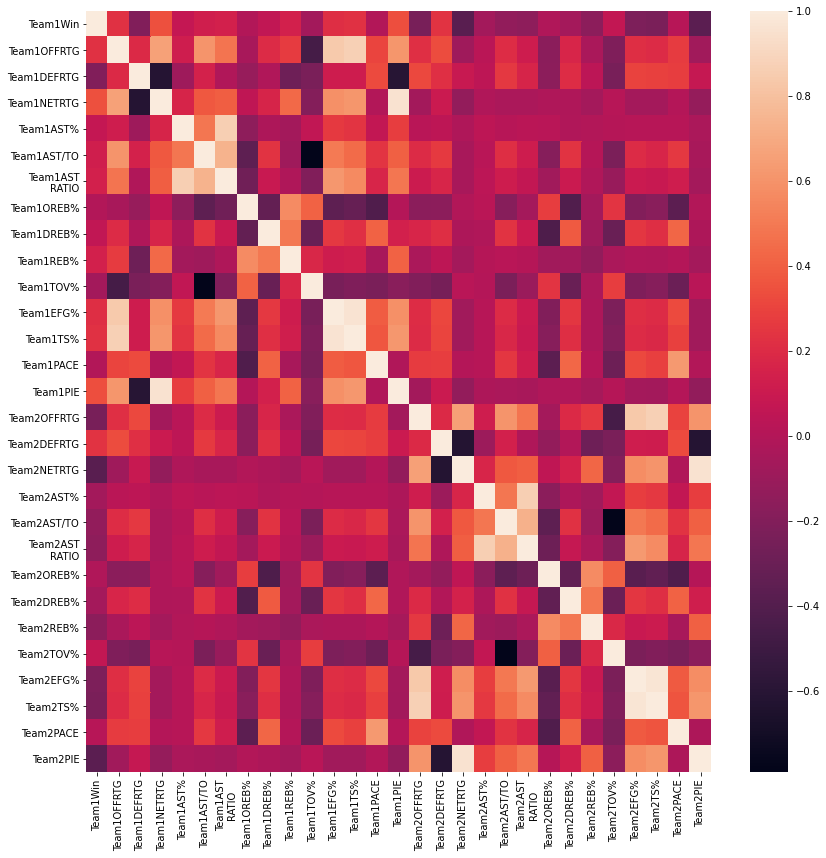

In [4]:
plt.figure(figsize=(14,14))
var_corr=data.corr()
sns.heatmap(var_corr,xticklabels=var_corr.columns,yticklabels=var_corr.columns,annot=False)

<AxesSubplot:xlabel='Team1Win', ylabel='Team2NETRTG'>

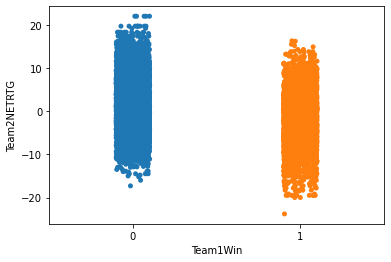

In [5]:
sns.stripplot(x=data['Team1Win'],y=data['Team2NETRTG'])


In [6]:
X=np.asarray(data.drop(['Team1Win'],axis=1))
Y=np.asarray(data['Team1Win'])
from sklearn import preprocessing
X=preprocessing.scale(X)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=42)
name,accuracy=['LinearSVC','KNN','SVC','BaggingClassifier','RandomForest'],[]

In [24]:
from sklearn.svm import LinearSVC
lclf = LinearSVC(random_state=0, tol=1e-5, max_iter=5000)
lclf.fit(X_train, Y_train)
accuracy.append(lclf.score(X_test,Y_test))

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
accuracy.append(knn.score(X_test, Y_test))

In [26]:
from sklearn.svm import SVC
from sklearn import svm
clf = SVC(gamma='scale',probability=True)
clf.fit(X_train, Y_train)
accuracy.append(clf.score(X_test,Y_test))

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
advclf = BaggingClassifier(base_estimator=SVC(gamma='scale'), n_estimators=10, random_state=0)
advclf.fit(X_train, Y_train)
accuracy.append(advclf.score(X_test,Y_test))

In [28]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(max_depth=8, random_state=0, n_estimators=300)
rdf.fit(X_train, Y_train)
accuracy.append(rdf.score(X_test,Y_test))

In [29]:
df=pd.DataFrame(list(zip(name,accuracy)),columns=['Model','Accuracy'])
print(df)

               Model  Accuracy
0          LinearSVC  0.714749
1                KNN  0.673767
2                SVC  0.705487
3  BaggingClassifier  0.706414
4       RandomForest  0.702477


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

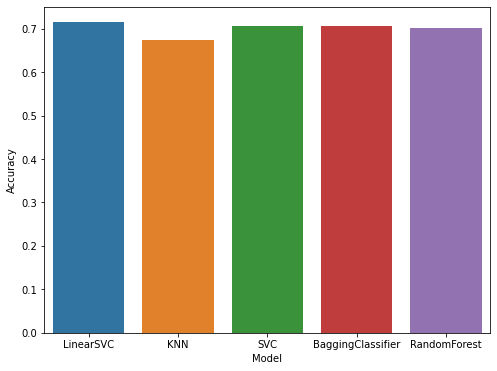

In [39]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['Model'],y=df['Accuracy'])